Created a Jupyter Notebook named "initial_data_exploration.ipynb" and perform preliminary data exploration. For example:

1) Read the datasets into dataframes.

2) Find out number of observatoins and columns,

3) Column data types,

4) Check for number of unique categories for categorical variables.

5) Check for missing values

6) Identify potential features for machine learning (some columns may not have predictive power)

7) Identify the target column 

8) Look at the distribution of the target columns. for categorical type, find out if it is imblanced. For numeric type, see how it is distributed  (summary statistics, boxplot, histogram).

This notebook must be well formatted/styled with Markdown cells, code cells along with results. It must be checked into GitHub as part of the submission.

In [19]:
#importing the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure' , figsize=(12,6))
import seaborn as sns

In [20]:
onlineRetail = pd.read_excel("./data/online_retail_II.xlsx")

In [21]:
onlineRetail.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [22]:
onlineRetail.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [23]:
#Drop items with no description and Customer ID
onlineRetail.shape

(525461, 8)

In [24]:
onlineRetail.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
#https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php

In [25]:
onlineRetail.shape

(417534, 8)

In [26]:
onlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [30]:
onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])

In [36]:
onlineRetail['YearMonth'] = onlineRetail['InvoiceDate'].map(lambda date: 100*date.year + date.month)
onlineRetail['Mon_Year'] = onlineRetail['InvoiceDate'].dt.strftime('%b-%Y')
onlineRetail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Mon_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,Dec-2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,Dec-2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,Dec-2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,Dec-2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,Dec-2009
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,200912,Dec-2009
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,Dec-2009
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,200912,Dec-2009
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,200912,Dec-2009
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,200912,Dec-2009


In [35]:
onlineRetail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,YearMonth,Mon_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,December-2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,December-2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,December-2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,December-2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,December-2009
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,200912,December-2009
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,December-2009
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,200912,December-2009
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,200912,December-2009
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,200912,December-2009


In [ ]:
sns.pairplot(onlineRetail);


KeyboardInterrupt



<AxesSubplot:>

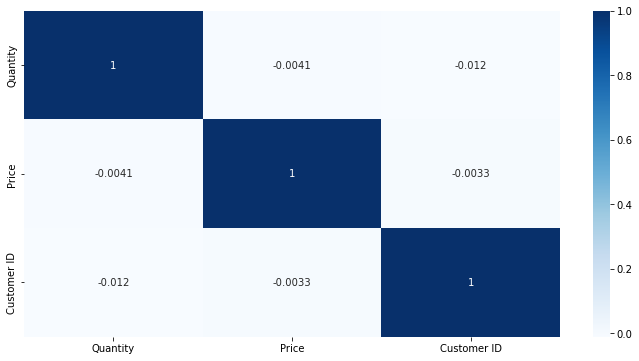

In [28]:
sns.heatmap(onlineRetail.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Quantity')

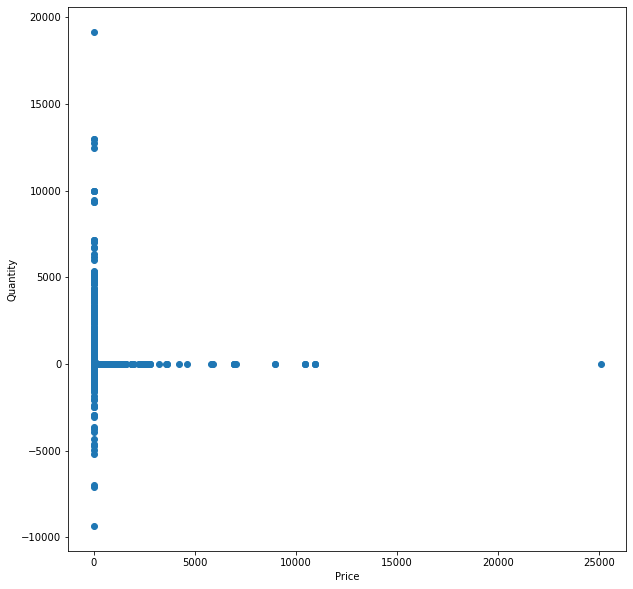

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x='Price',y='Quantity',data=onlineRetail)
plt.xlabel('Price')
plt.ylabel('Quantity')